In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:

# Load the data
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df.shape

(39717, 111)

In [8]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [15]:
# Check column wise and remove the Null values.
df.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
df.shape

(39717, 57)

In [13]:
#After going through Data Dictionarys 
# 1. Colums {"id", "member_id, "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state"} holding data which 
#    are for individual not useful for overall loan defaulting terms, so droping those.

In [17]:
df.drop(["desc","id", "member_id", "title", "emp_title", "url","zip_code", "addr_state"], axis = 1, inplace = True)

In [9]:
df.shape

(39717, 49)

In [19]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [27]:
# Columns with single value can not use for analysis, So droping them 

In [21]:
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','next_pymnt_d','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [12]:
df.shape

(39717, 39)

In [23]:
# Investers related colums are not required, Because we focused on loan deafulters.
df.drop(['total_pymnt_inv','out_prncp_inv', 'funded_amnt_inv'], axis = 1, inplace = True)

In [25]:
# Checking any null values still available 
print((df.isnull().sum()/len(df))*100)

loan_amnt                    0.000000
funded_amnt                  0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_length                   2.706650
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
purpose                      0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mths               0.000000
mths_since_last_delinq      64.662487
mths_since_last_record      92.985372
open_acc                     0.000000
pub_rec                      0.000000
revol_bal                    0.000000
revol_util                   0.125891
total_acc                    0.000000
out_prncp                    0.000000
total_pymnt 

In [27]:
# Droping mths_since_last_delinq,next_pymnt_d & mths_since_last_record  becuse, Maximum data is missing
df.drop(['mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)


In [29]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_length                38642 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  issue_d                   39717 non-null  object 
 12  loan_status               39717 non-null  object 
 13  purpose                   39717 non-null  object 
 14  dti   

In [33]:
#The last_credit_pull_d and revol_util' has very low null values so removing the rows for which values are null.
df.dropna(axis = 0, subset = ['last_credit_pull_d','revol_util'] , inplace = True)


In [70]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.702635
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.000000
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [35]:
# For emp_lengh missing values are with low percentage, So using mode value doesnt affect the analysis much comapred to mean and median
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [37]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.000000
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [74]:
# chargeoff_within_12_mths & next_pymnt_d are not required for defaulting the cause study. So removing those columns

In [39]:
df.drop(['last_pymnt_d','chargeoff_within_12_mths'], axis = 1, inplace = True)

In [41]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                  0.0
funded_amnt                0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
total_pymnt                0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_amnt            0.0
last_credit_pull_d         0.0
dtype: f

In [43]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


In [45]:
# Seting int_rate % to standerd 
# setting emp_lengh years lessthan 1 as 0, 10+years as 10,1 year as 1
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [47]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


In [51]:
loan_status = df["loan_status"]
print(loan_status.value_counts())

loan_status
Fully Paid     32915
Charged Off     5610
Current         1140
Name: count, dtype: int64


# as we focusing on default the current statts loans need to be ignored

In [55]:

df = df[df.loan_status != "Current"]

In [58]:
df['term_months'] = df['term'].str.rstrip('months')
del df['term']

In [69]:
columns = ['total_acc', 'term_months']
df[columns] = df[columns].astype(int)

In [67]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,term_months
0,5000,5000,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,0.0,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,36
1,2500,2500,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,60
2,2400,2400,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,0.0,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,36
3,10000,10000,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,0.0,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,36
5,5000,5000,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,...,0.0,5632.210000,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,36


In [224]:
df2.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'term_months', 'annual_inc_thousand',
       'int_rate_groups', 'open_acc_groups'],
      dtype='object')

# **UNIVARIANT ANALYSIS**

In [78]:
## outlier method

In [86]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [74]:
df['annual_inc_thousand'] = df['annual_inc'] / 1000
df['annual_inc_thousand'].describe()


count    38525.000000
mean        68.807194
std         64.215914
min          4.000000
25%         40.000000
50%         59.000000
75%         82.000000
max       6000.000000
Name: annual_inc_thousand, dtype: float64

In [82]:
# Detect and visualize outliers in 'loan_amnt'
outliers = detect_outliers(df, 'annual_inc_thousand')
print(f"Number of outliers in 'annual_inc_thousand': {len(outliers)}")

Number of outliers in 'annual_inc_thousand': 1761


In [94]:
# removing the outliers in annual income
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] > lower_bound) & (data[column] < upper_bound)]

In [92]:
df1 = df

In [102]:
df2 = remove_outliers_iqr(df1, 'annual_inc_thousand')

In [2]:

df2['int_rate_groups'] = pd.cut(df2['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

NameError: name 'pd' is not defined

In [ ]:
## creating bins for open_acc, based on min and max creating bins

In [198]:

df2['open_acc_groups'] = pd.cut(df2['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

# Loan Amount

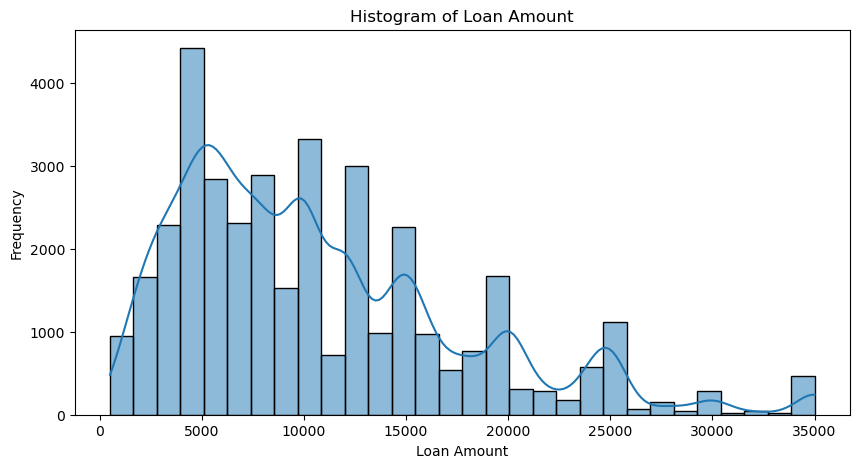

In [256]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['loan_amnt'], bins=30, kde=True)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The distribution of loan amounts is right-skewed with most loans between `$5,000` and `$15,000`.

# Funded Amount

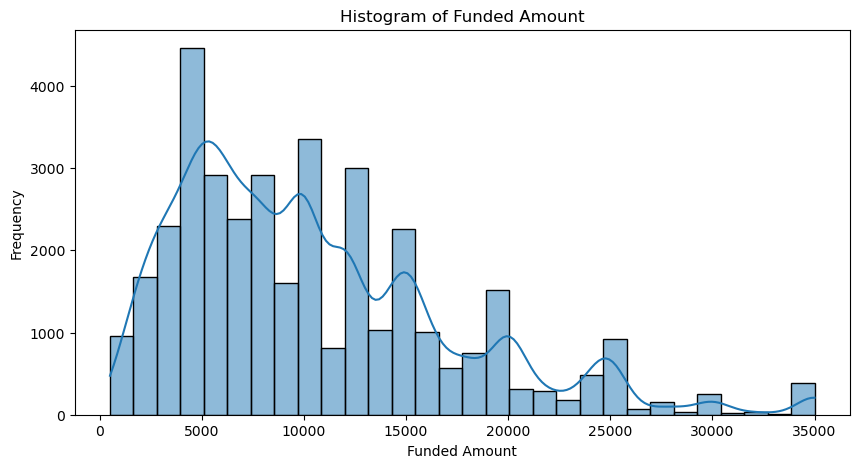

In [266]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['funded_amnt'], bins=30, kde=True)
plt.title('Histogram of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The funded amount closely follows the distribution of loan amounts, indicating that most loans are fully funded.

# Interest Rate

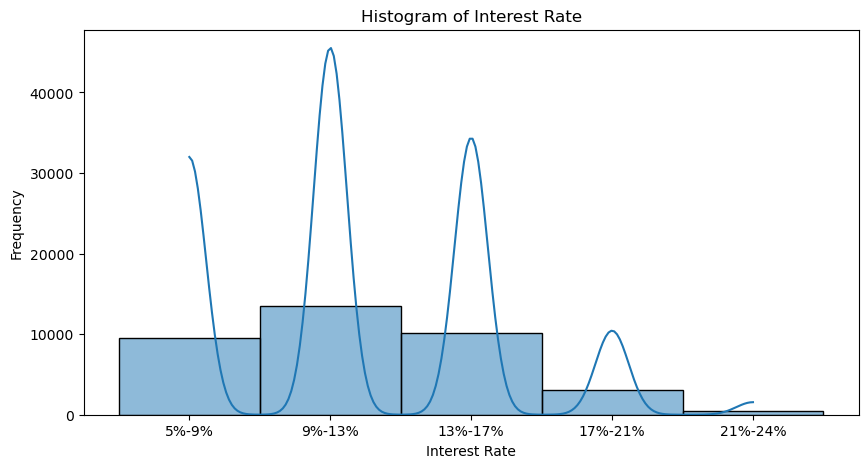

In [509]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['int_rate_groups'], bins=30, kde=True)
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The interest rates are fairly distributed between 5% and 24%, with peaks around 10%, 13%, and 17%.

# Installment

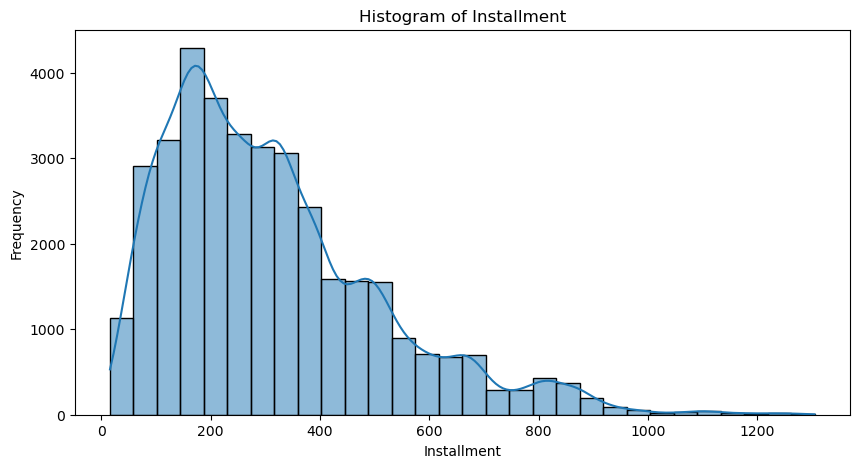

In [280]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['installment'], bins=30, kde=True)
plt.title('Histogram of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Installments are mostly below `$500`, with a significant number concentrated between `$100` and `$400`.

# Grade

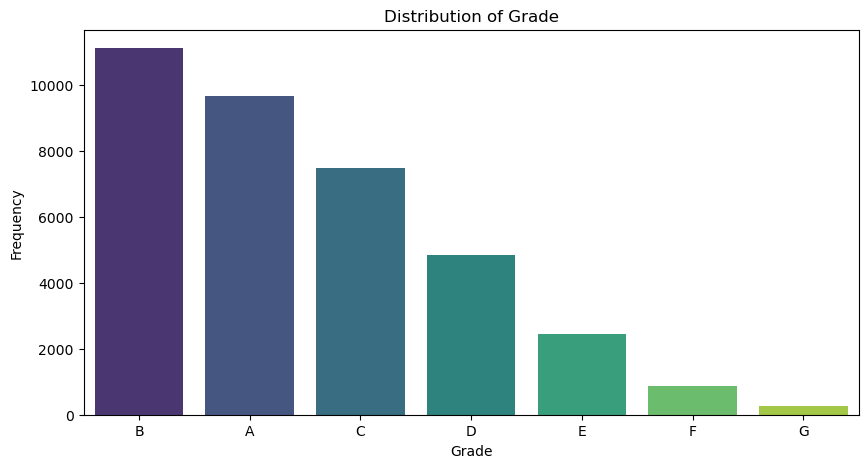

In [291]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['grade'], order=df2['grade'].value_counts().index, palette='viridis')
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The majority of loans are graded B ,A and C, indicating a moderate risk profile of the loan applicants.


# Sub-Grade

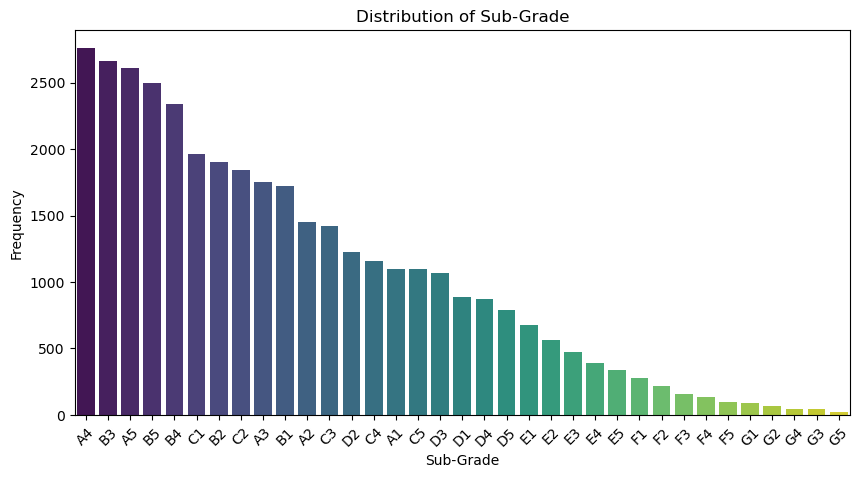

In [299]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['sub_grade'], order=df2['sub_grade'].value_counts().index, palette='viridis')
plt.title('Distribution of Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Comment:
# Sub-grades provide a finer distribution within grades, with sub-grades A4, B3, and A5 being the most common.

# Employment Length

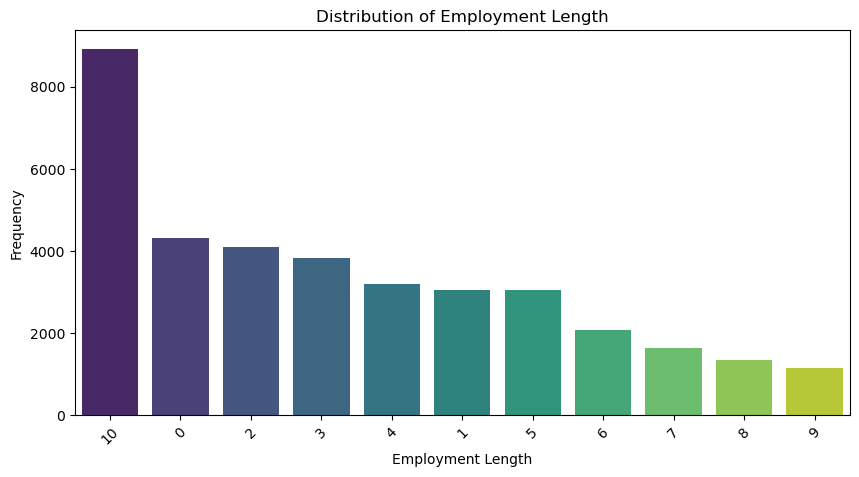

In [307]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['emp_length'], order=df2['emp_length'].value_counts().index, palette='viridis')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Comment:
# Most borrowers have 10+ years of employment, followed by 2, 3, and 1-year employment lengths. This suggests a varied employment history among borrowers.

# Home Ownership

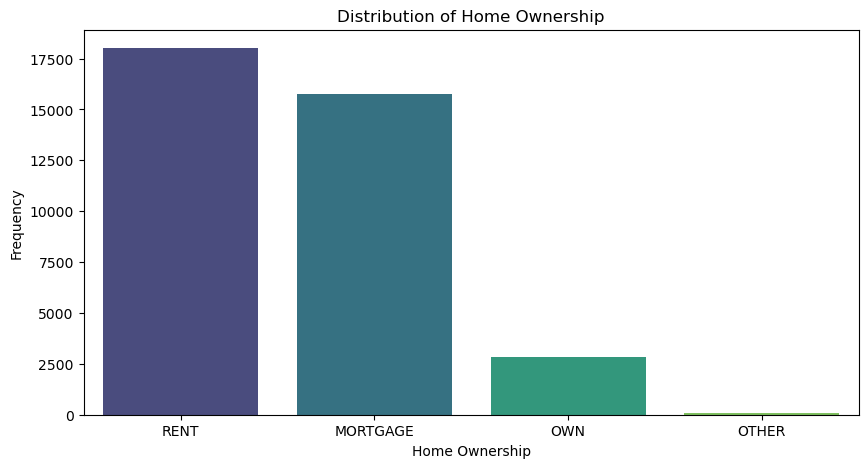

In [315]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['home_ownership'], order=df2['home_ownership'].value_counts().index, palette='viridis')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most borrowers are either renting or have mortgages, with fewer owning their homes outright.

# Annual Income (in thousands)

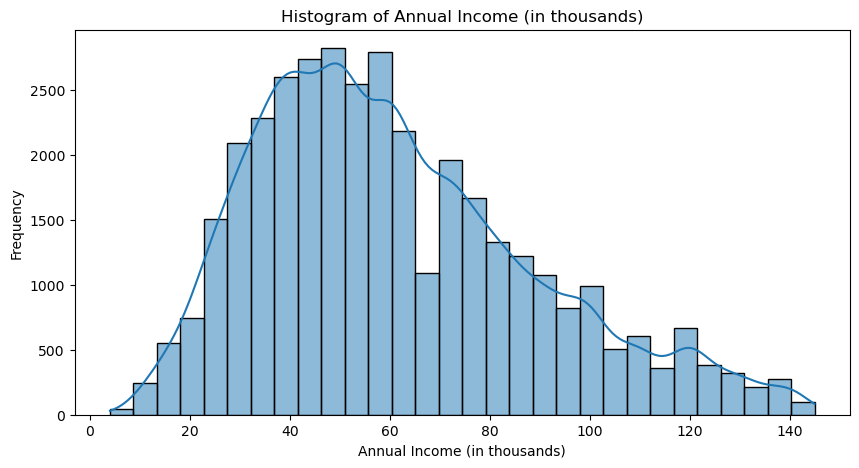

In [321]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['annual_inc_thousand'], bins=30, kde=True)
plt.title('Histogram of Annual Income (in thousands)')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Annual income shows a right-skewed distribution, with most borrowers earning between `$20k` and `$100k` annually.

# Verification Status

In [328]:
df2['verification_status'].value_counts()

verification_status
Not Verified       16273
Verified           11259
Source Verified     9168
Name: count, dtype: int64

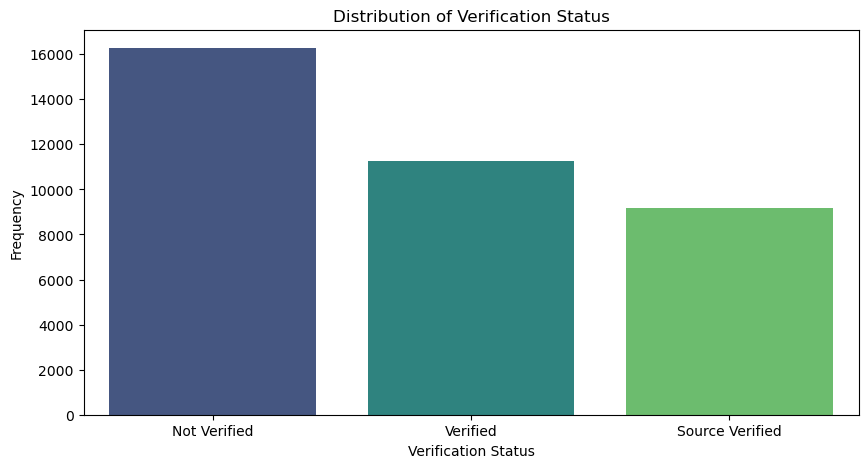

In [326]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['verification_status'], order=df2['verification_status'].value_counts().index, palette='viridis')
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The majority of people have not verified income source, indicating a measure to reduce risk. 

# Loan Status

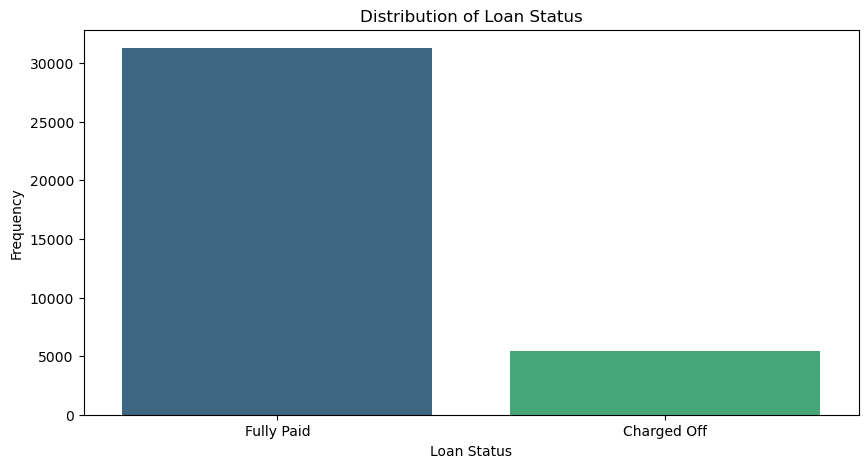

In [334]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['loan_status'], order=df2['loan_status'].value_counts().index, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most loans are fully paid or charged off, with fewer current and other statuses.

# Purpose

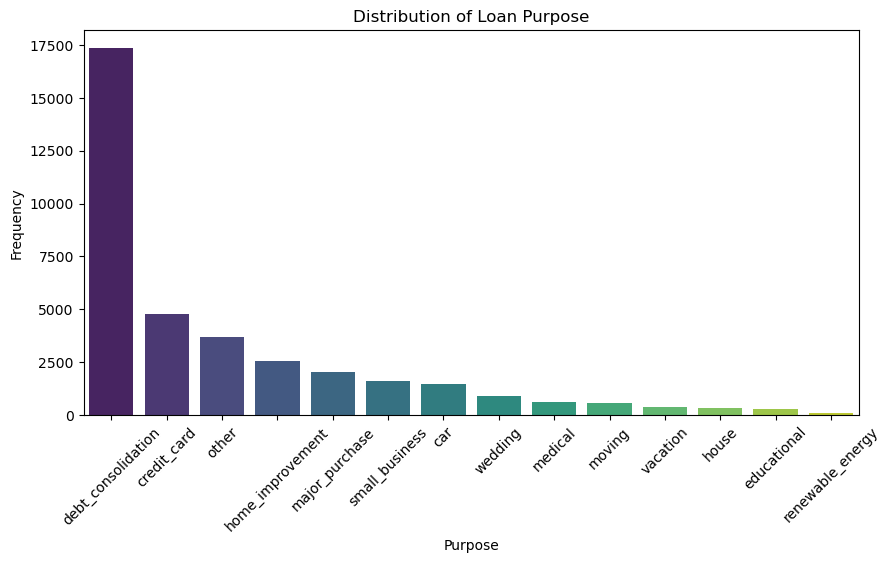

In [336]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['purpose'], order=df2['purpose'].value_counts().index, palette='viridis')
plt.title('Distribution of Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Comment:
# Debt consolidation is the most common purpose for loans, followed by credit card repayment and home improvement.

# Debt-to-Income Ratio (DTI)

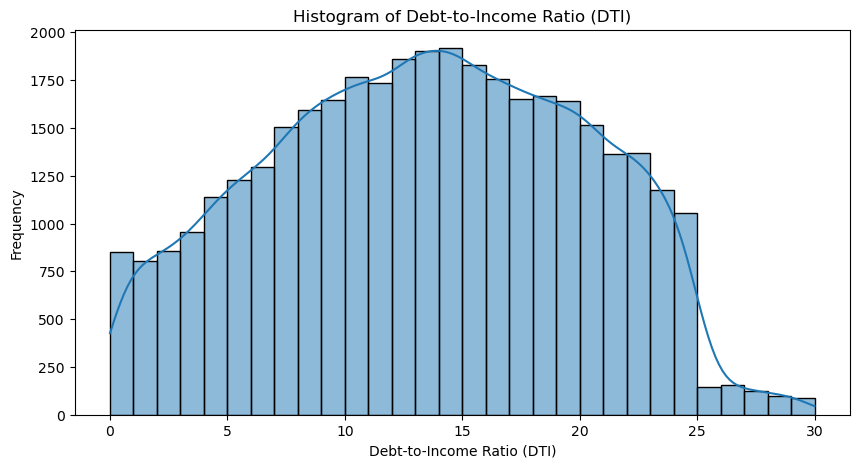

In [343]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['dti'], bins=30, kde=True)
plt.title('Histogram of Debt-to-Income Ratio (DTI)')
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The DTI ratio is mostly below 30%, indicating that most borrowers have a manageable level of debt relative to their income.

# Delinquency in 2 Years

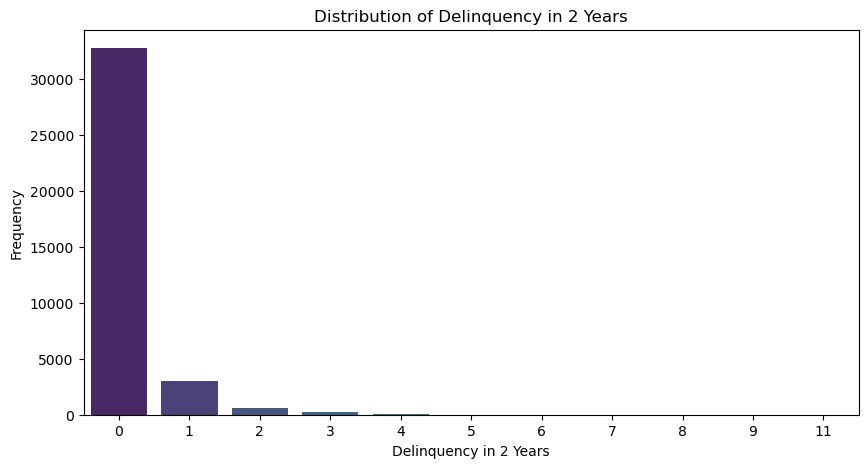

In [349]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['delinq_2yrs'], palette='viridis')
plt.title('Distribution of Delinquency in 2 Years')
plt.xlabel('Delinquency in 2 Years')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most borrowers have zero delinquencies in the past two years, indicating a relatively good credit history.

# Inquiries in Last 6 Months

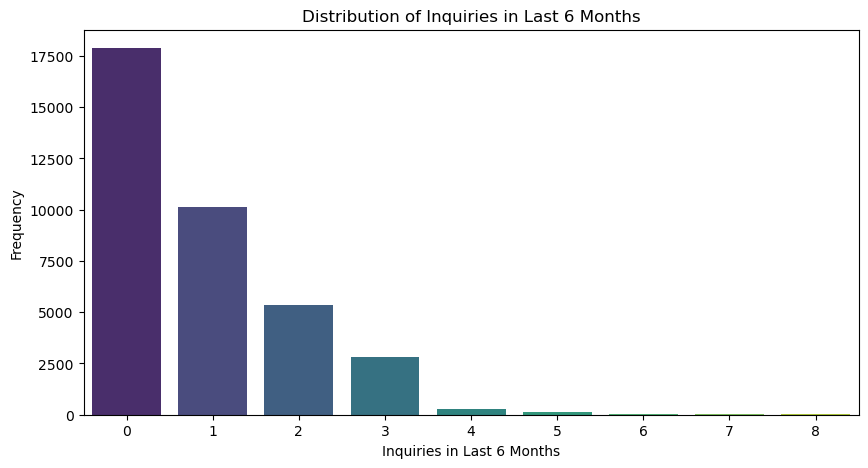

In [355]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['inq_last_6mths'], palette='viridis')
plt.title('Distribution of Inquiries in Last 6 Months')
plt.xlabel('Inquiries in Last 6 Months')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The majority of borrowers have made zero or one inquiry in the last six months, suggesting a cautious approach to seeking new credit.

# Open Accounts

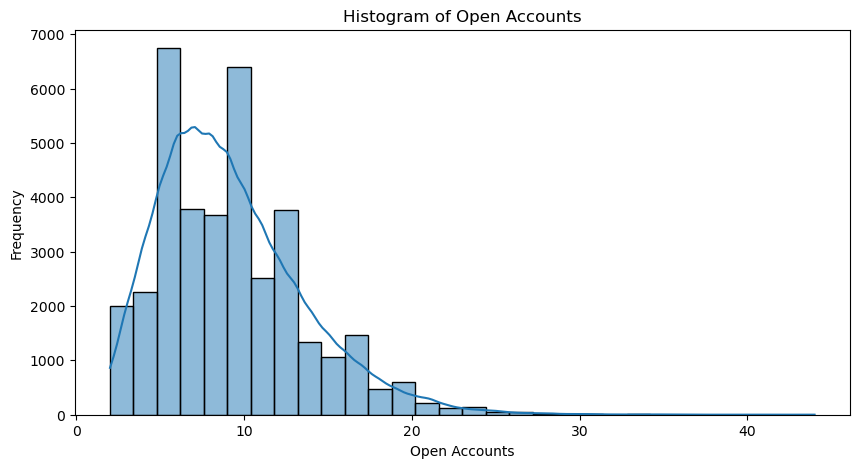

In [358]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['open_acc'], bins=30, kde=True)
plt.title('Histogram of Open Accounts')
plt.xlabel('Open Accounts')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The number of open accounts varies, with most borrowers having between 5 and 15 open accounts.

# Public Records

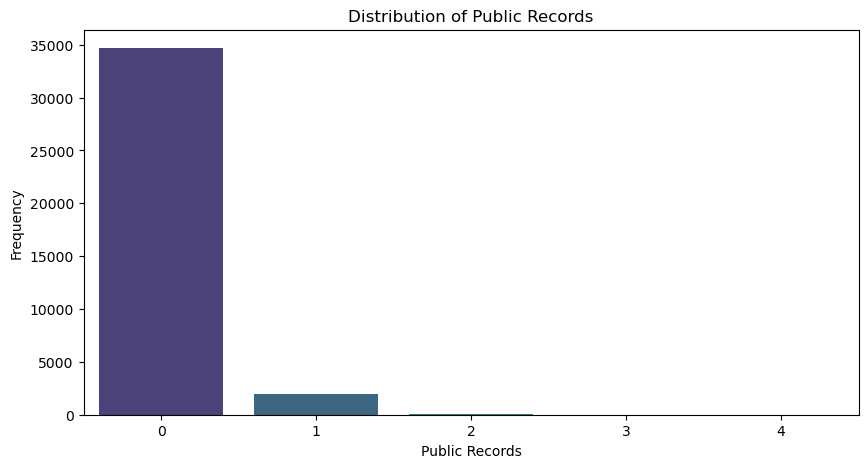

In [365]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['pub_rec'], palette='viridis')
plt.title('Distribution of Public Records')
plt.xlabel('Public Records')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most borrowers have no public records, indicating clean public financial histories.

# Revolving Balance

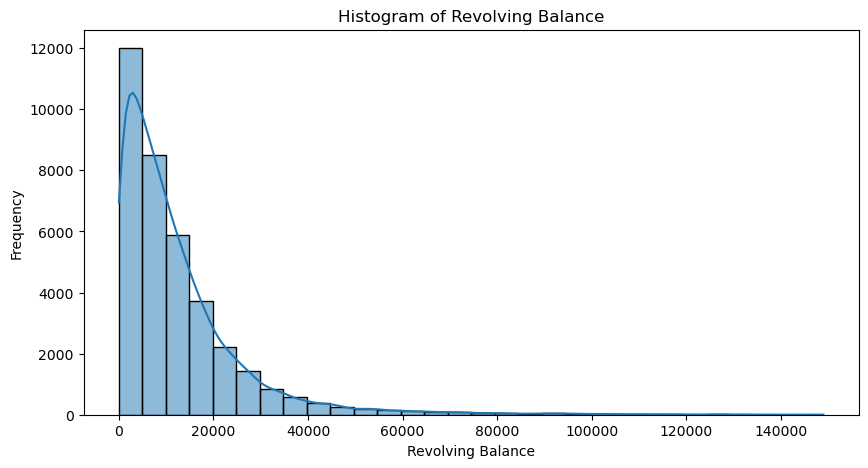

In [371]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['revol_bal'], bins=30, kde=True)
plt.title('Histogram of Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Revolving balances vary widely, with most borrowers having a balance under $20,000.

# Revolving Utilization

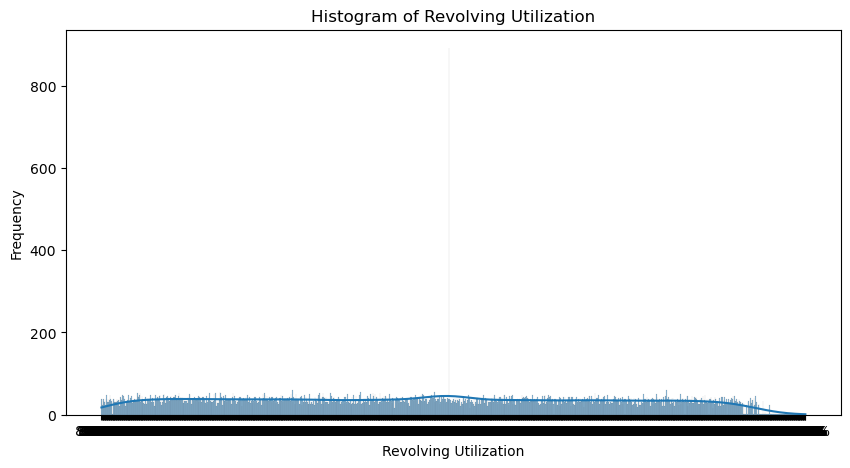

In [383]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['revol_util'], bins=30, kde=True)
plt.title('Histogram of Revolving Utilization')
plt.xlabel('Revolving Utilization')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Revolving utilization is mostly under 80%, with peaks around 20% and 60%.

# Total Accounts

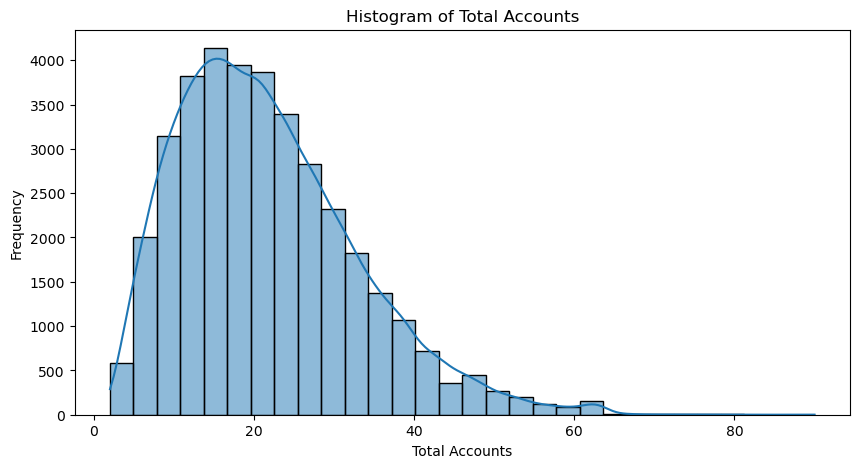

In [389]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['total_acc'], bins=30, kde=True)
plt.title('Histogram of Total Accounts')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most borrowers have 10 to 40 total accounts.

# Out Principal

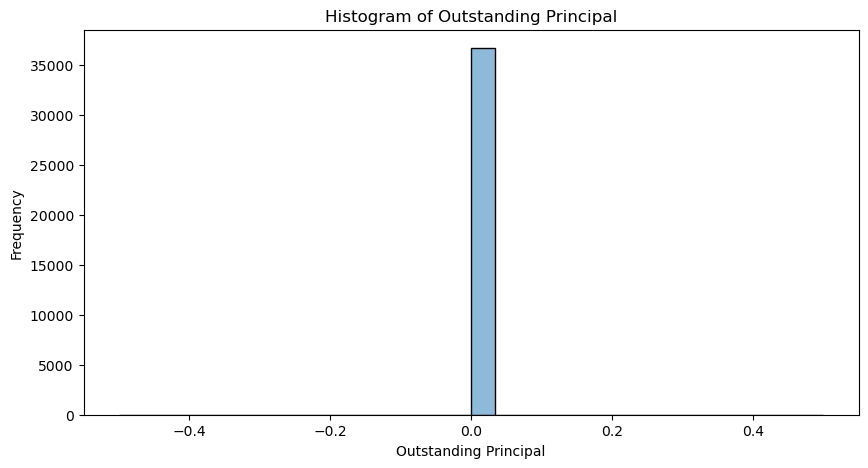

In [397]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['out_prncp'], bins=30, kde=True)
plt.title('Histogram of Outstanding Principal')
plt.xlabel('Outstanding Principal')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Outstanding principal amounts vary, with a significant number of borrowers having no outstanding principal.

# Total Payment

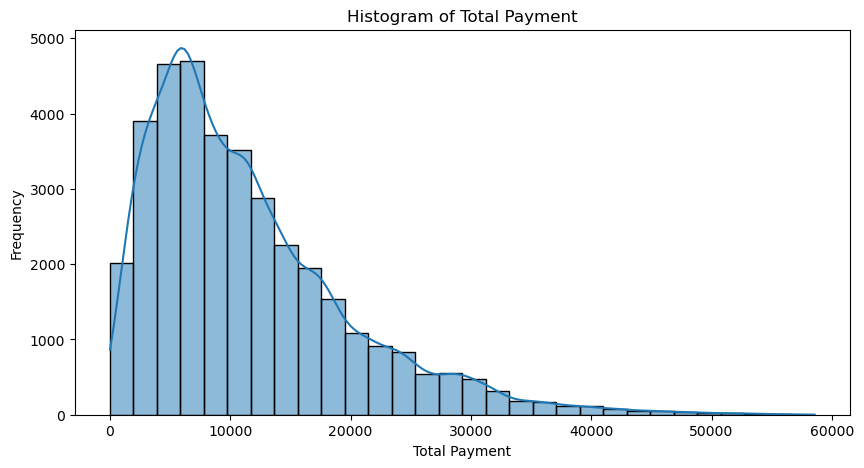

In [403]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['total_pymnt'], bins=30, kde=True)
plt.title('Histogram of Total Payment')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Total payments are right-skewed, with most borrowers having made payments under $20,000.

# Total Received Principal

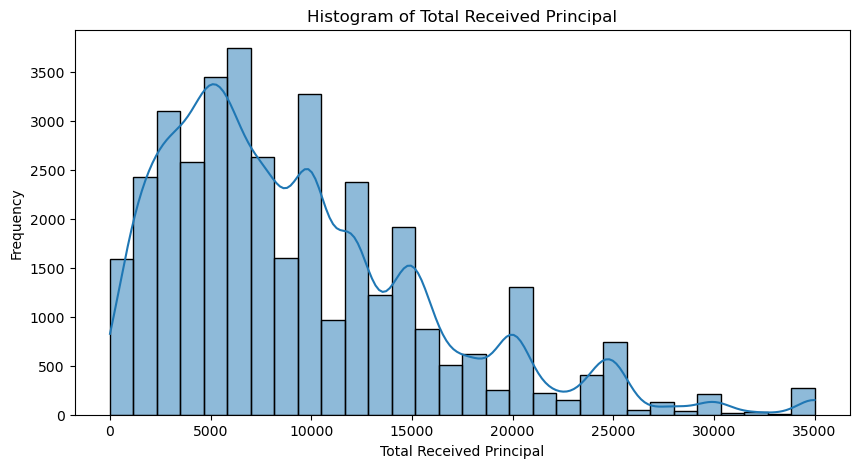

In [409]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['total_rec_prncp'], bins=30, kde=True)
plt.title('Histogram of Total Received Principal')
plt.xlabel('Total Received Principal')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The total received principal shows that most borrowers have paid back a significant portion of their principal.

# Total Received Interest

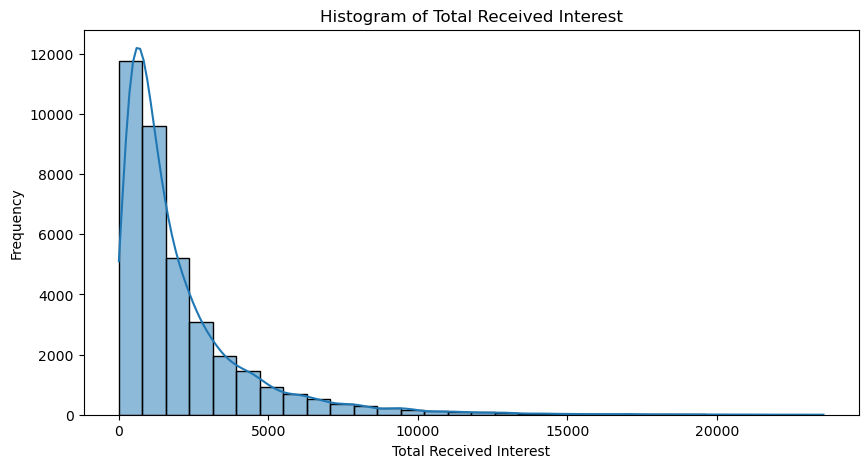

In [415]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['total_rec_int'], bins=30, kde=True)
plt.title('Histogram of Total Received Interest')
plt.xlabel('Total Received Interest')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Total received interest varies, with most borrowers paying under $5,000 in interest.

# Total Received Late Fee

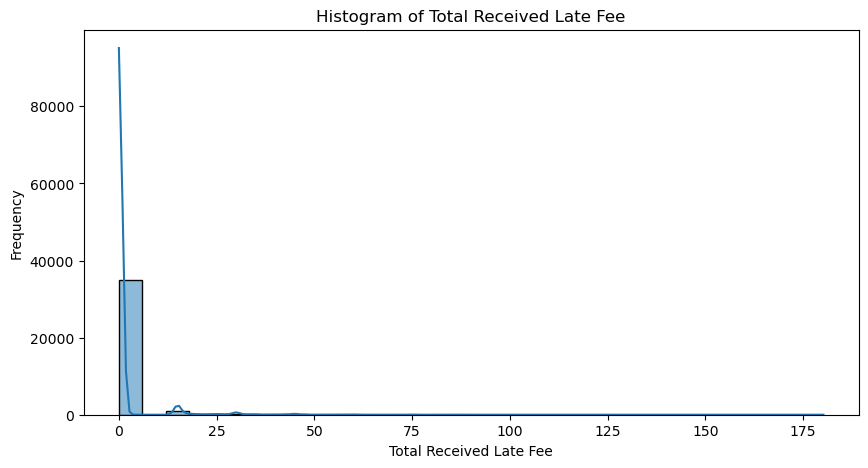

In [421]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['total_rec_late_fee'], bins=30, kde=True)
plt.title('Histogram of Total Received Late Fee')
plt.xlabel('Total Received Late Fee')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Most borrowers have paid very little in late fees, indicating timely payments.

# Recoveries

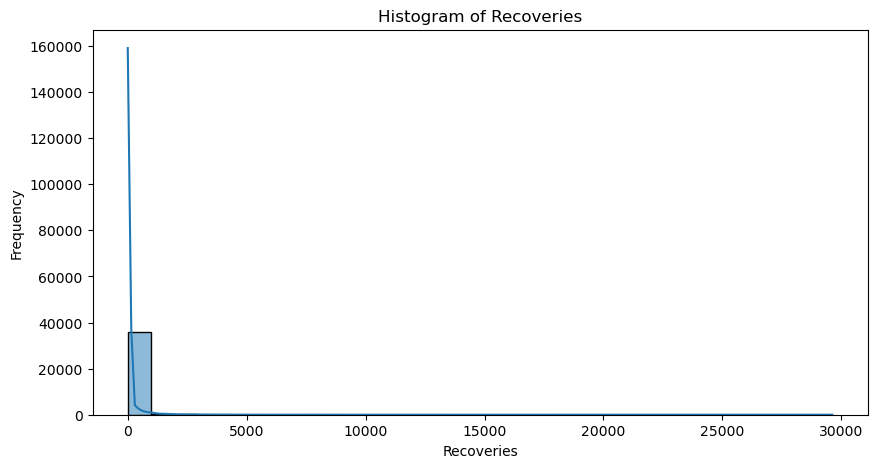

In [428]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['recoveries'], bins=30, kde=True)
plt.title('Histogram of Recoveries')
plt.xlabel('Recoveries')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Recoveries are typically low, with most values near zero.

# Collection Recovery Fee

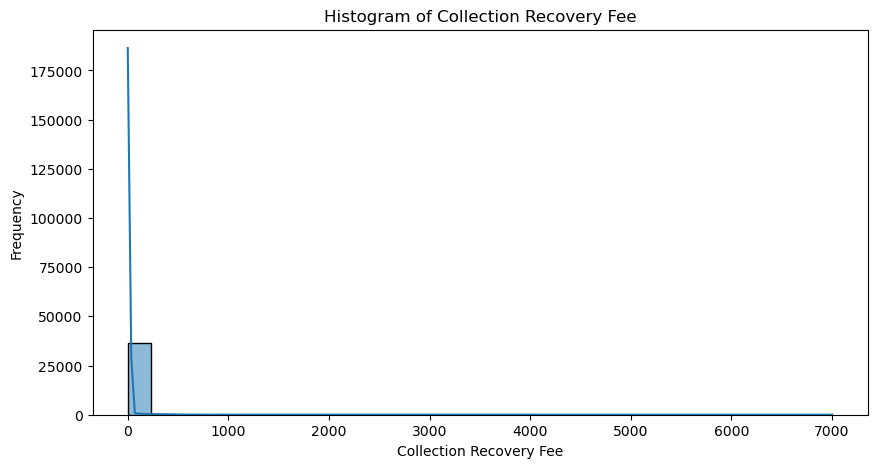

In [434]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['collection_recovery_fee'], bins=30, kde=True)
plt.title('Histogram of Collection Recovery Fee')
plt.xlabel('Collection Recovery Fee')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Collection recovery fees are minimal for most borrowers.

# Last Payment Amount

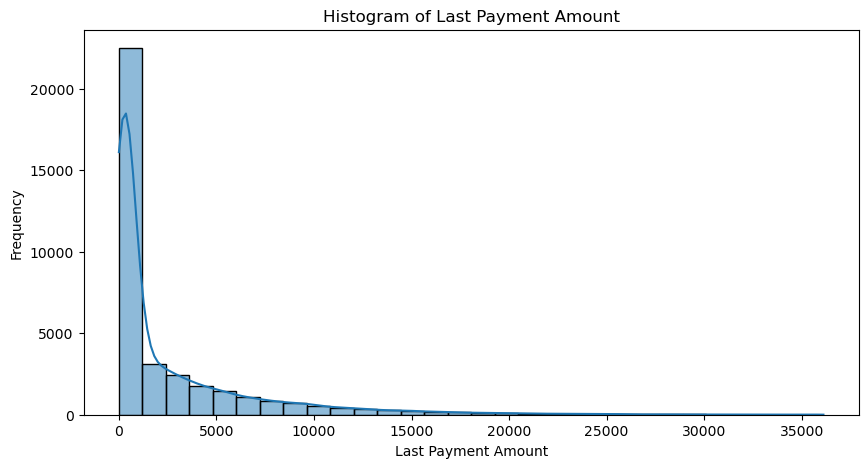

In [440]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['last_pymnt_amnt'], bins=30, kde=True)
plt.title('Histogram of Last Payment Amount')
plt.xlabel('Last Payment Amount')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Last payment amounts vary widely, with a peak around smaller payments under $1,000.

# Term (Months)

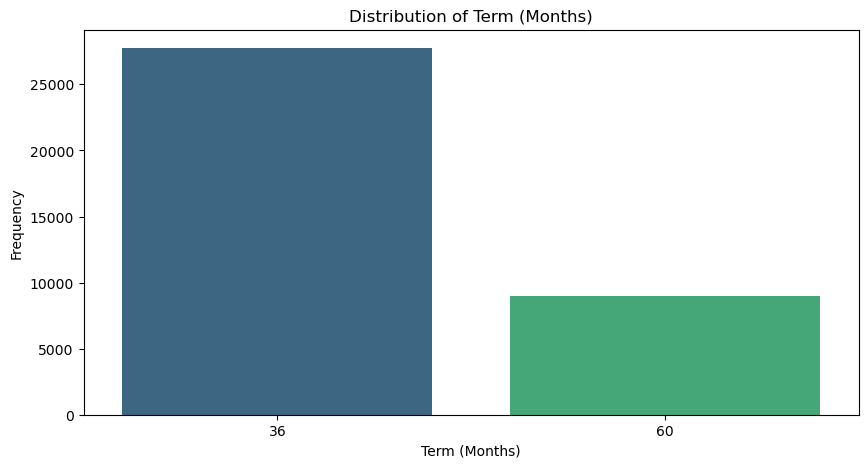

In [446]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['term_months'], palette='viridis')
plt.title('Distribution of Term (Months)')
plt.xlabel('Term (Months)')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The majority of loans have a term of 36 months, with a smaller portion having 60-month terms.

# Interest Rate Groups

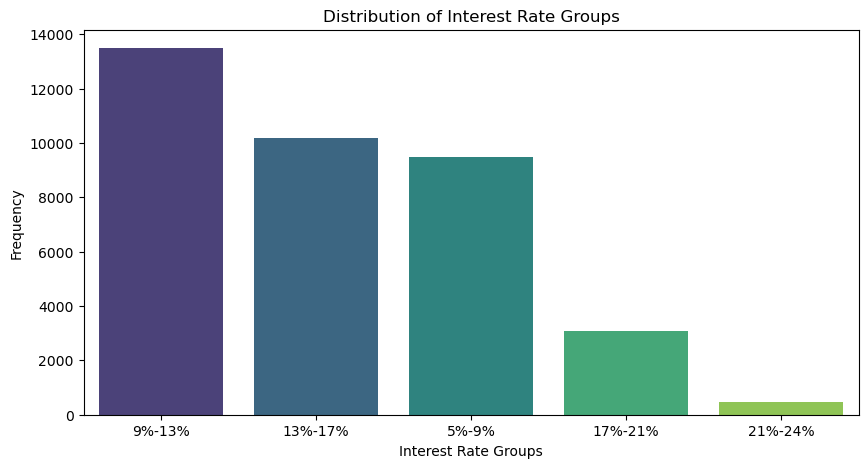

In [452]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['int_rate_groups'], order=df2['int_rate_groups'].value_counts().index, palette='viridis')
plt.title('Distribution of Interest Rate Groups')
plt.xlabel('Interest Rate Groups')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Interest rate groups are fairly distributed, with each group having a similar number of loans.

# Open Account Groups

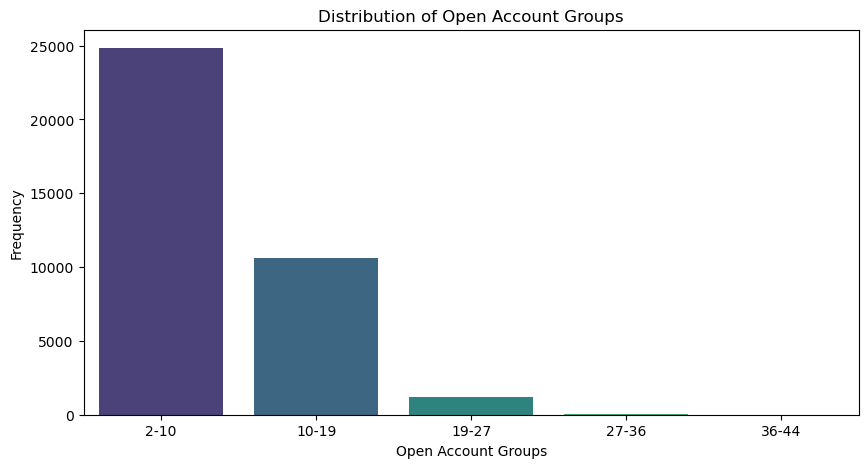

In [458]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['open_acc_groups'], order=df2['open_acc_groups'].value_counts().index, palette='viridis')
plt.title('Distribution of Open Account Groups')
plt.xlabel('Open Account Groups')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Open account groups show that most borrowers have 5-15 open accounts.

In [493]:
df2['issue_d'].value_counts()

issue_d
Dec-11    1970
Nov-11    1963
Oct-11    1816
Sep-11    1794
Aug-11    1703
Jul-11    1659
Jun-11    1621
May-11    1534
Apr-11    1497
Mar-11    1365
Jan-11    1324
Feb-11    1244
Dec-10    1214
Jul-10    1084
Nov-10    1080
Oct-10    1073
Sep-10    1032
Aug-10    1030
Jun-10     986
May-10     889
Apr-10     793
Mar-10     697
Feb-10     591
Nov-09     569
Dec-09     555
Jan-10     553
Oct-09     515
Sep-09     428
Aug-09     391
Jul-09     354
Jun-09     338
May-09     305
Apr-09     278
Mar-09     268
Feb-09     251
Jan-09     226
Mar-08     221
Dec-08     206
Nov-08     179
Feb-08     169
Jan-08     163
Apr-08     146
Oct-08      89
Dec-07      81
Jul-08      81
May-08      69
Aug-08      66
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      26
Jul-07      24
Sep-07      15
Jun-07       1
Name: count, dtype: int64

In [497]:
# Convert date columns to datetime
df2['issue_d'] = pd.to_datetime(df2['issue_d'], format='%b-%y')
df2['last_credit_pull_d'] = pd.to_datetime(df2['last_credit_pull_d'], format='%b-%y')

# Extract year and month from date columns
df2['issue_year'] = df2['issue_d'].dt.year
df2['issue_month'] = df2['issue_d'].dt.month
df2['last_credit_pull_year'] = df2['last_credit_pull_d'].dt.year
df2['last_credit_pull_month'] = df2['last_credit_pull_d'].dt.month

# Display the modified dataframe to check the conversion
df2[['issue_d', 'issue_year', 'issue_month', 'last_credit_pull_d', 'last_credit_pull_year', 'last_credit_pull_month']].head()


,issue_d,issue_year,issue_month,last_credit_pull_d,last_credit_pull_year,last_credit_pull_month
0,2011-12-01,2011,12,2016-05-01,2016,5
1,2011-12-01,2011,12,2013-09-01,2013,9
2,2011-12-01,2011,12,2016-05-01,2016,5
3,2011-12-01,2011,12,2016-04-01,2016,4
5,2011-12-01,2011,12,2016-01-01,2016,1


# Issue Year

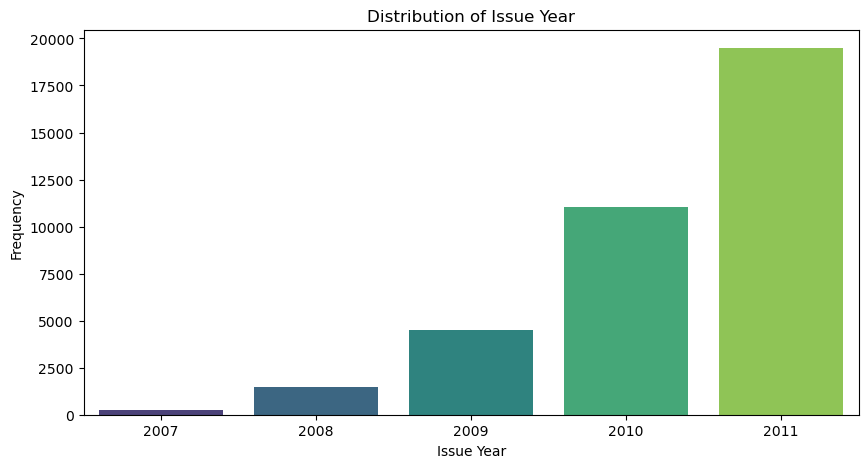

In [499]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['issue_year'], palette='viridis')
plt.title('Distribution of Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.show()

# Comment:
# The majority of loans were issued with increasing trend from 2007, with max being in 2011.

# Issue Month

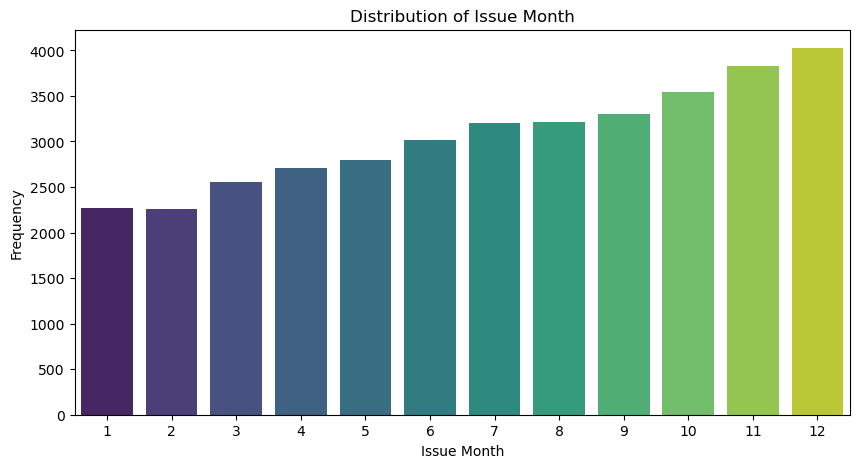

In [501]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df2['issue_month'], palette='viridis')
plt.title('Distribution of Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.show()

# Comment:
# Loans were issued fairly evenly throughout the year, with no significant peaks in any particular month. With than december being highest

In [507]:
df2.emp_length.head()

0    10
1     0
2    10
3    10
5     3
Name: emp_length, dtype: int64

# **BIVARIATE ANALYSIS**


In [525]:
# Function to create bar plot for categorical variables vs loan status
def plot_categorical_vs_loan_status(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='loan_status', data=data)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)
    plt.show()

# Function to create box plot for numerical variables vs loan status
def plot_numerical_vs_loan_status(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=column, data=data)
    plt.title(title)
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()

In [583]:
# Function to create box plot with log-transformed data
def plot_log_transformed(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=np.log1p(data[column]), data=data)
    plt.title(title)
    plt.xlabel('Loan Status')
    plt.ylabel(f'Log of {column}')
    plt.show()

# Function to remove outliers and create box plot
def plot_without_outliers(data, column, title):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=column, data=filtered_data)
    plt.title(title)
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()


# Categorical variables vs Loan Status

# Home Ownership vs Loan Status

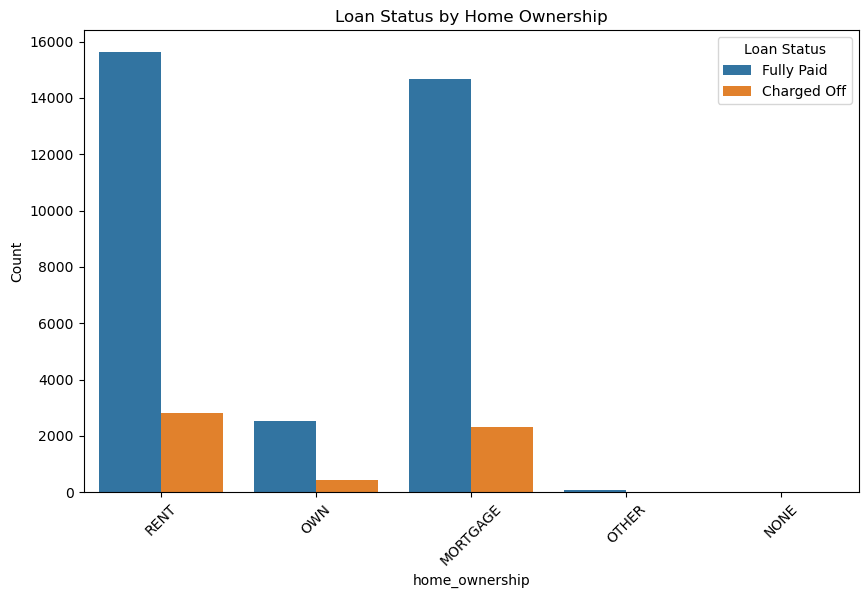

In [533]:
plot_categorical_vs_loan_status(df, 'home_ownership', 'Loan Status by Home Ownership')

# Conclusion: Renters and people who have mortgages have a higher default rate compared to those who own homes.

# Verification Status vs Loan Status

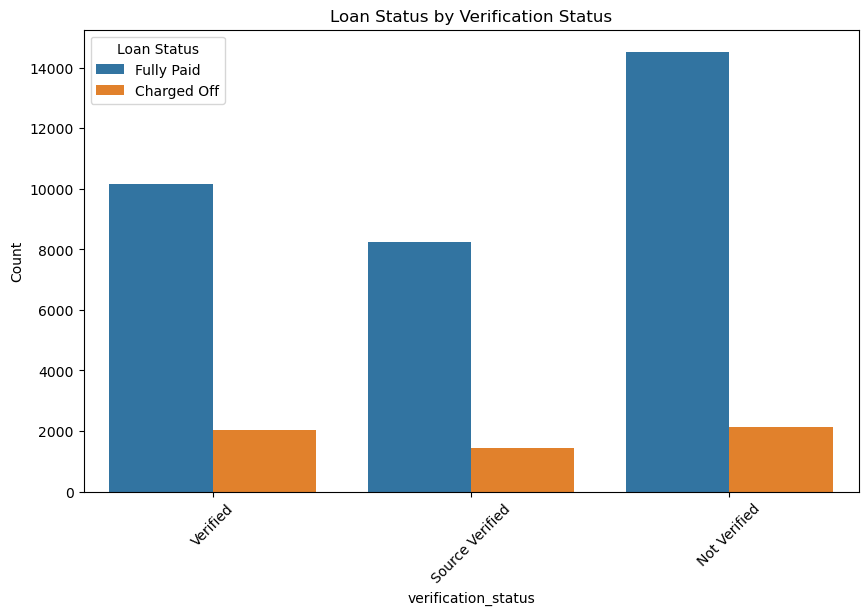

In [541]:
plot_categorical_vs_loan_status(df, 'verification_status', 'Loan Status by Verification Status')

# Conclusion: Loans with unverified income have a higher default rate than those with verified income.

# Purpose vs Loan Status

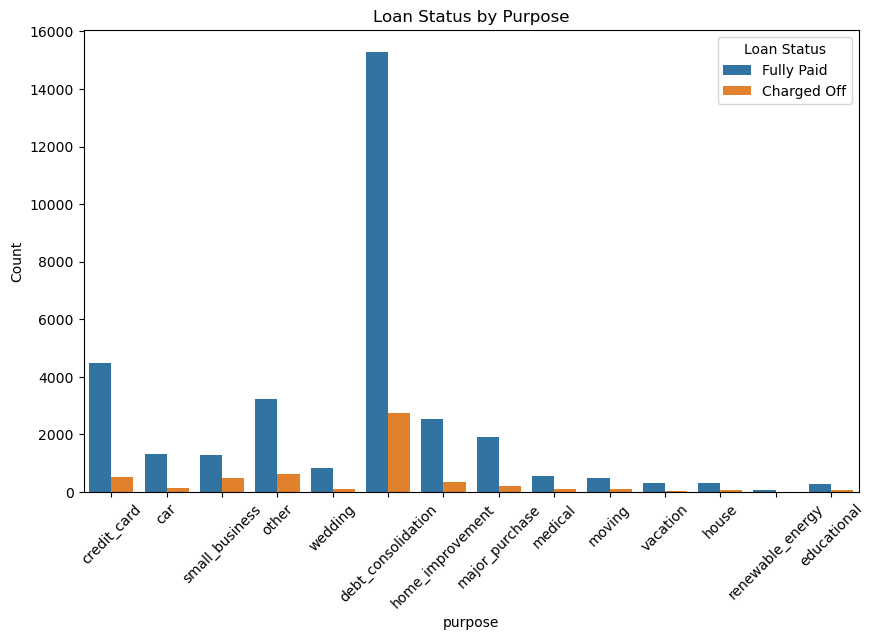

In [547]:
plot_categorical_vs_loan_status(df, 'purpose', 'Loan Status by Purpose')

# Conclusion: Loans taken for debt consolidation and credit card repayment have higher default rates.

# Grade vs Loan Status

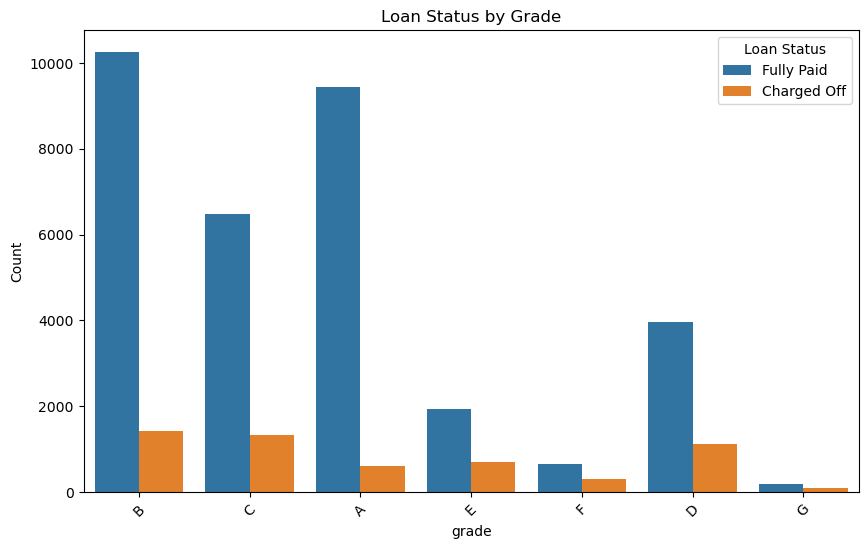

In [553]:
plot_categorical_vs_loan_status(df, 'grade', 'Loan Status by Grade')

# Conclusion: Lower loan grades (D, E, F, G) have higher default rates compared to higher grades (A, B, C).

# Employment Length vs Loan Status

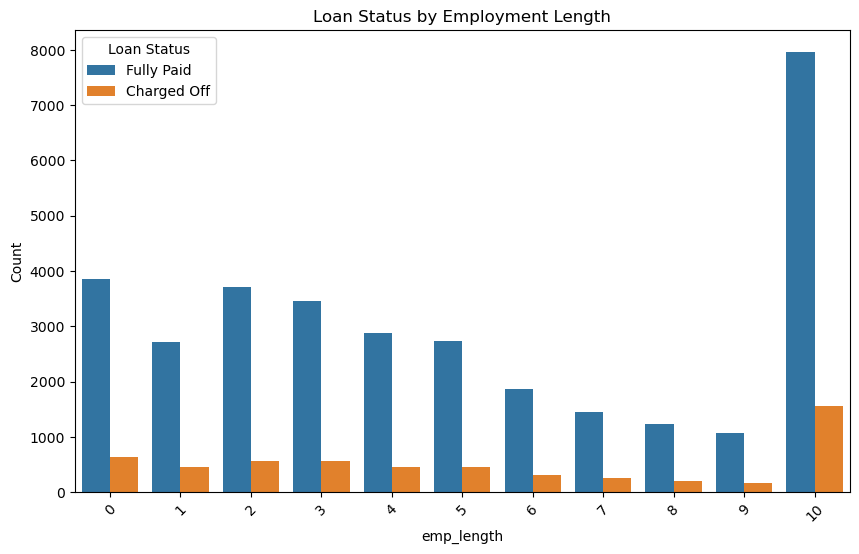

In [559]:
plot_categorical_vs_loan_status(df, 'emp_length', 'Loan Status by Employment Length')

# Conclusion: Borrowers with large employment lengths have a higher rate of defaults.

# Numerical variables vs Loan Status

# Loan Amount vs Loan Status

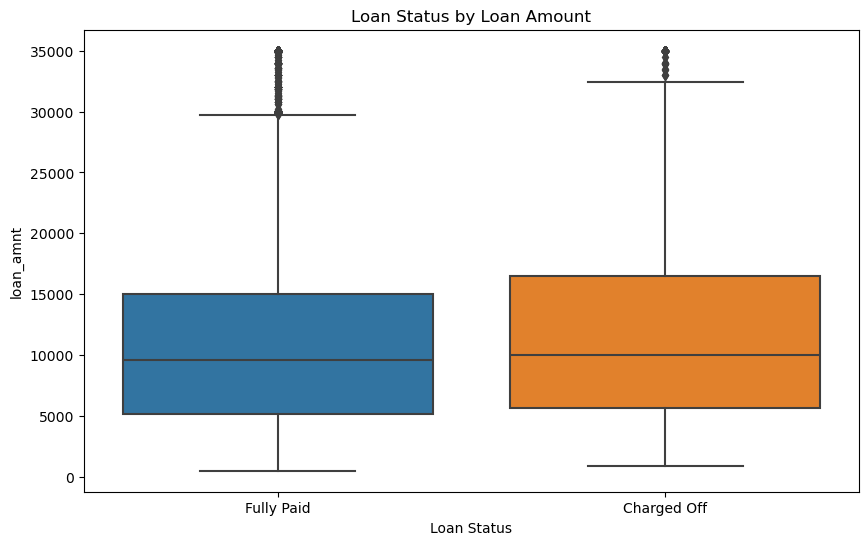

In [568]:
plot_numerical_vs_loan_status(df, 'loan_amnt', 'Loan Status by Loan Amount')

# Conclusion: Larger loan amounts show a higher tendency towards being charged-off.

# Interest Rate vs Loan Status

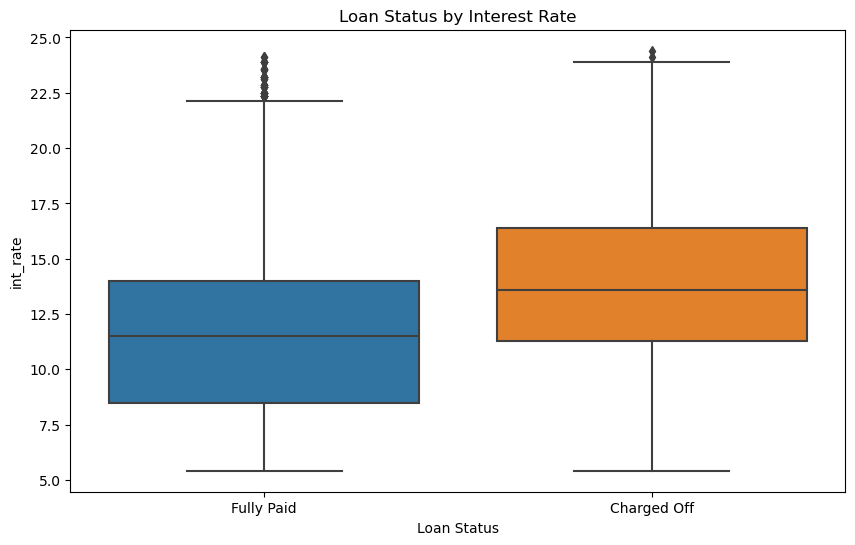

In [574]:
plot_numerical_vs_loan_status(df, 'int_rate', 'Loan Status by Interest Rate')

# Conclusion: Higher interest rates correlate with a higher proportion of charged-off loans.

# Annual Income (in thousands) vs Loan Status - Log Transformed

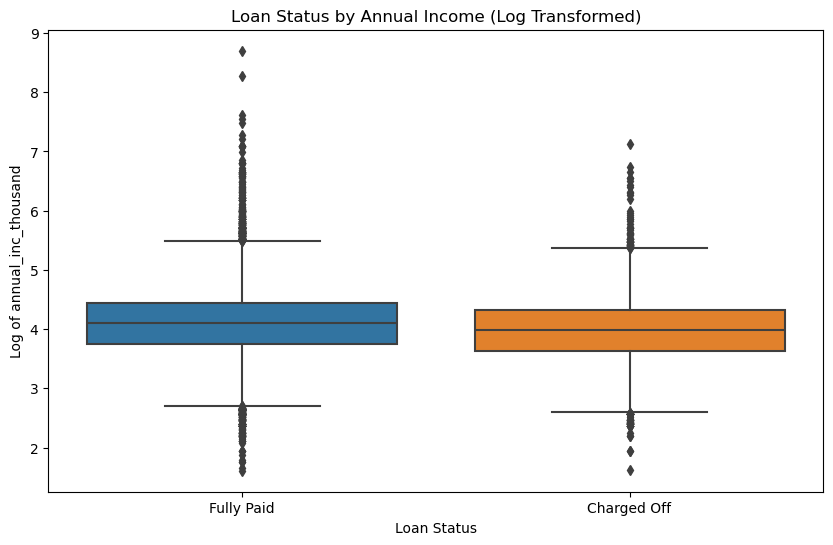

In [588]:
plot_log_transformed(df, 'annual_inc_thousand', 'Loan Status by Annual Income (Log Transformed)')

# Conclusion: Log transformation reduces the impact of outliers, showing a clearer trend of lower incomes having higher default rates.

# Annual Income (in thousands) vs Loan Status - Without Outliers

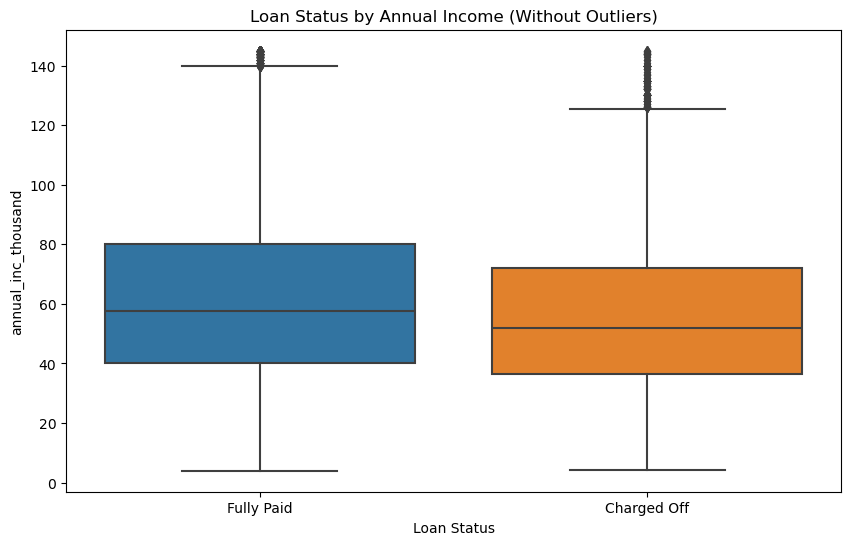

In [592]:
plot_without_outliers(df, 'annual_inc_thousand', 'Loan Status by Annual Income (Without Outliers)')

# Conclusion: Removing outliers provides a clearer view that lower annual incomes tend to default more frequently.

# Debt-to-Income Ratio (DTI) vs Loan Status

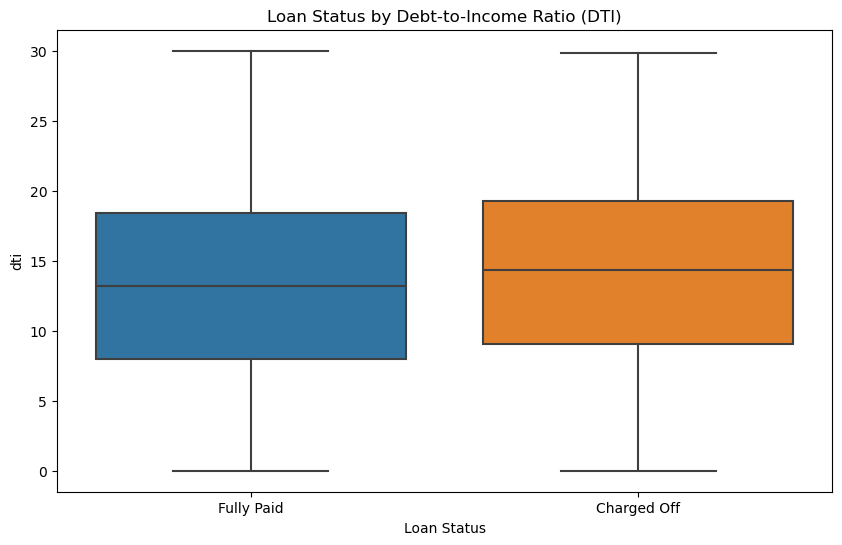

In [598]:
plot_numerical_vs_loan_status(df, 'dti', 'Loan Status by Debt-to-Income Ratio (DTI)')

# Conclusion: Higher DTI ratios are associated with a higher likelihood of default.

# Revolving Balance vs Loan Status

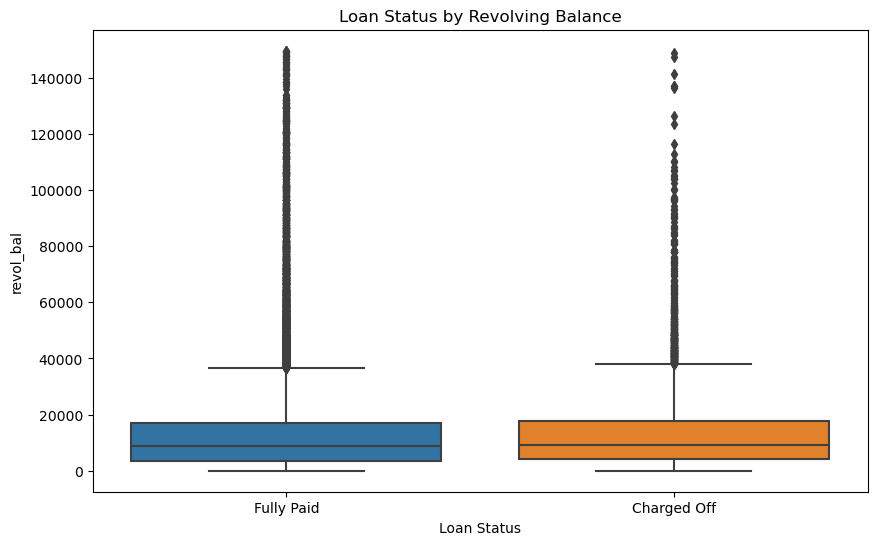

In [604]:
plot_numerical_vs_loan_status(df, 'revol_bal', 'Loan Status by Revolving Balance')

# Conclusion: Slightly Higher revolving balances are associated with a higher default rate. Though not much difference

# Installment Amount vs Loan Status

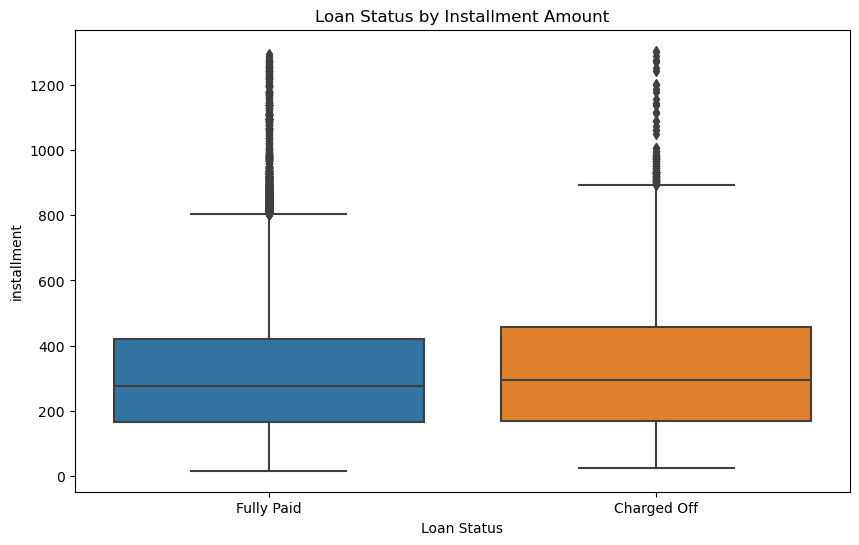

In [611]:
plot_numerical_vs_loan_status(df, 'installment', 'Loan Status by Installment Amount')

# Conclusion: Higher monthly installments are associated with a higher default rate.

# Issue Year vs Loan Status

In [627]:
df2.issue_month.dtype

dtype('int32')

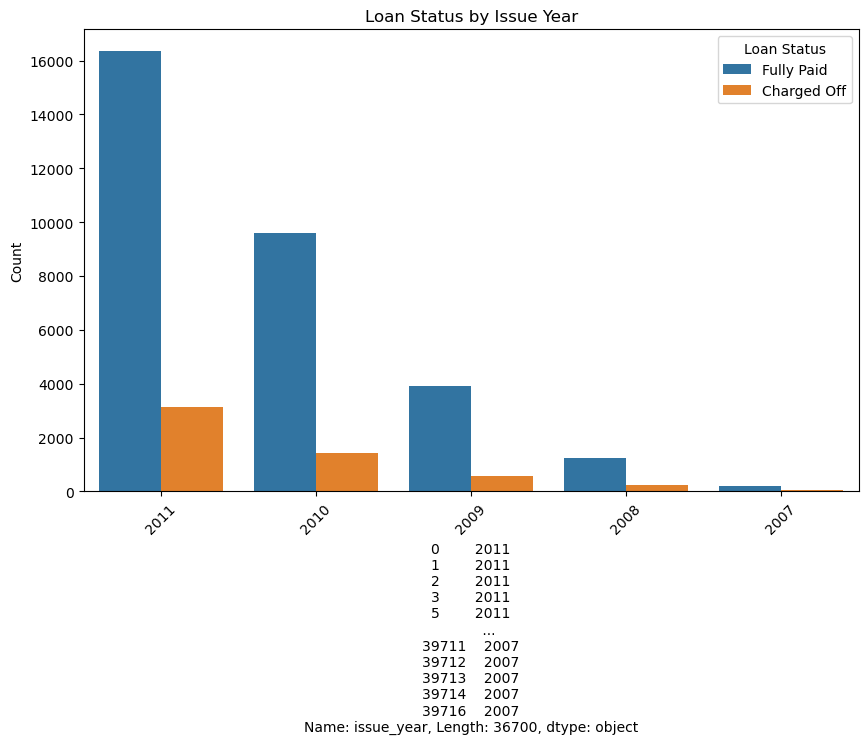

In [633]:
issueYear = df2['issue_year'].astype(str)
plot_categorical_vs_loan_status(df, issueYear, 'Loan Status by Issue Year')

# Conclusion: There might be trends over the years showing changes in default rates.

# Issue Month vs Loan Status

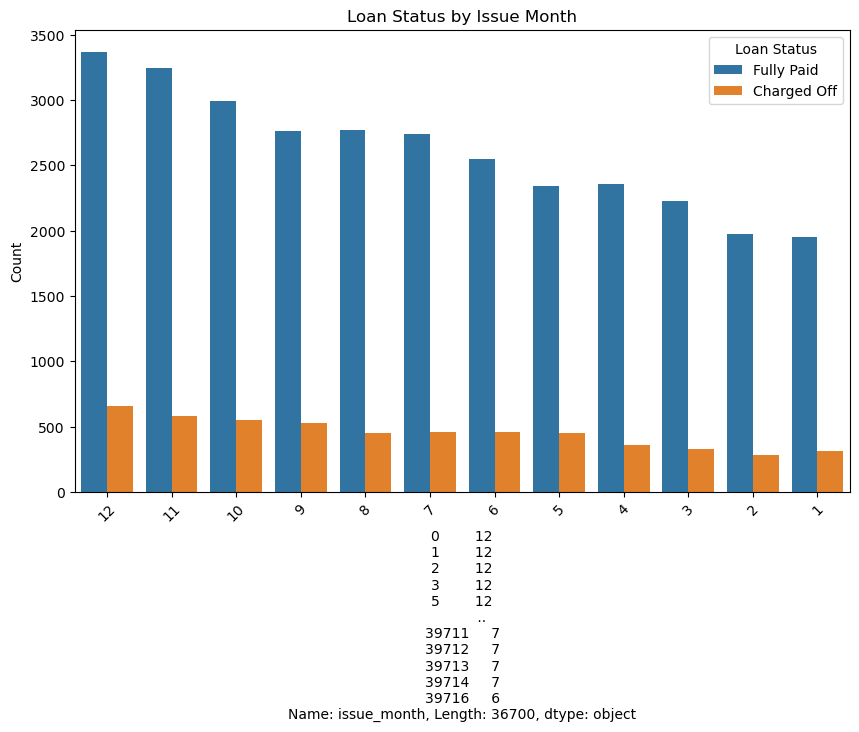

In [638]:
issueMonth = df2['issue_month'].astype(str)
plot_categorical_vs_loan_status(df, issueMonth, 'Loan Status by Issue Month')

# Conclusion: Monthly trends might indicate seasonal variations in default rates.

# Correlation matrix to understand the relationships between numerical variables

# Map loan_status to numerical values

In [683]:
df2['loan_status_num'] = df2['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

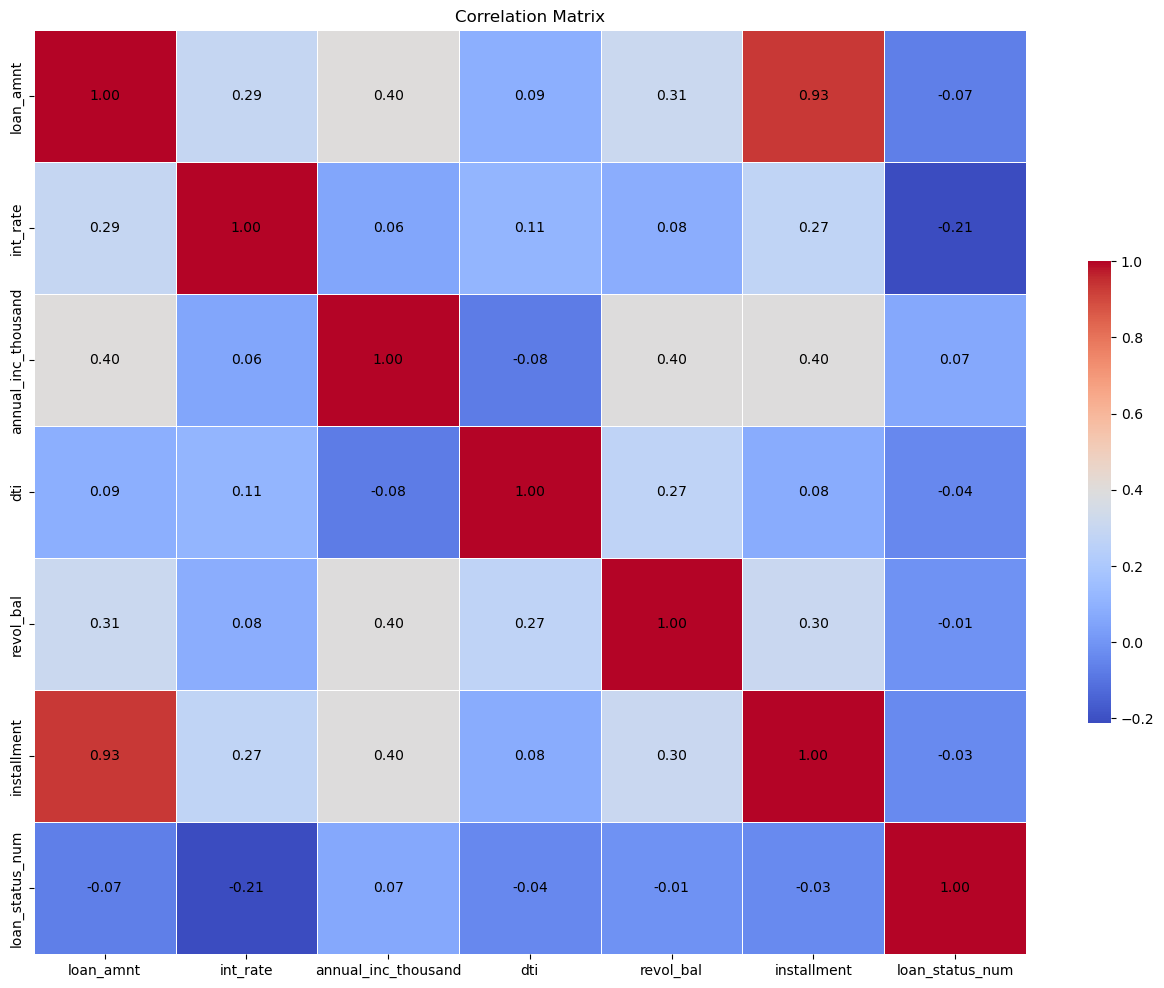

In [685]:
# Correlation matrix including loan_status_num
plt.figure(figsize=(16, 12))  # Increase figure size
correlation_matrix = df2[['loan_amnt', 'int_rate', 'annual_inc_thousand', 'dti', 'revol_bal', 'installment', 'loan_status_num']].corr()

# Define a function to add annotations
def annotate_heatmap(data, annot=True, fmt=".2f", textcolors=("black", "white"), threshold=None, **textkw):
    """
    A function to annotate a heatmap with text.
    """
    if not isinstance(data, (list, np.ndarray)):
        data = data.to_numpy()
    
    # Set default alignment to center
    textkw.setdefault("ha", "center")
    textkw.setdefault("va", "center")
    
    # Get the Axes object
    ax = plt.gca()
    # Loop over the data and create a `Text` for each "pixel"
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = format(data[i, j], fmt)
            if threshold is not None and data[i, j] > threshold:
                textcolor = textcolors[1]
            else:
                textcolor = textcolors[0]
            # Adjust the position to center the text within the block
            ax.text(j + 0.5, i + 0.5, val, color=textcolor, **textkw)

            

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Add annotations
annotate_heatmap(correlation_matrix, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()


# Conclusion: The correlation matrix helps to visualize the relationships between numerical variables.

### The correlations between loan_status_num and the other financial variables are all there, with the highest being a -0.21 correlation with the interest rate. Among them, the interest rate shows the most significant correlation, __"implying that loans with higher interest rates are slightly more likely to default"__. However, the overall picture suggests that these financial metrics are somewhat predictors of loan status.